子基金合成fof产品的净值表现

In [1]:
import numpy as np
import os
import tushare as ts
import pandas as pd
import xlrd
import empyrical as ep
import matplotlib.pyplot as plt
from matplotlib import rc

from fof_utils import value_to_return, read_sheet, weight_by_params, stats_df

rc('mathtext', default='regular')

from dateutil.relativedelta import relativedelta
import warnings

warnings.filterwarnings("ignore")


plt.rcParams['font.family'] = ['Microsoft YaHei']
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']

/home/hfin/anaconda3/envs/rqqa/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


# 读入产品数据
- excel格式，一个sheet对应一个产品
- sheet格式，第一列为日期，第二列为累计净值

In [2]:
# 设置工作区目录
workspace = os.path.abspath('../共赢fof1号')

In [3]:
file_path = os.path.join(workspace, '子基金净值表.xlsx')
total = read_sheet(file_path)
total

读取Index(['净值日期', '格量'], dtype='object')
读取Index(['净值日期', '品赋'], dtype='object')
读取Index(['净值日期', '象限'], dtype='object')
读取Index(['净值日期', '宽德'], dtype='object')
读取Index(['日期', '中信资管'], dtype='object')
读取Index(['净值日期', '平方和'], dtype='object')
读取Index(['日期', '致远三号'], dtype='object')
读取Index(['产品名称', '黑翼CTA三号'], dtype='object')


,格量,品赋,象限,宽德,中信资管,平方和,致远三号,黑翼CTA三号
2015-02-06,NaN,NaN,NaN,0.99990,NaN,NaN,NaN,NaN
2015-02-09,NaN,NaN,NaN,0.99982,NaN,NaN,NaN,NaN
2015-02-10,NaN,NaN,NaN,0.99974,NaN,NaN,NaN,NaN
2015-02-11,NaN,NaN,NaN,0.99966,NaN,NaN,NaN,NaN
2015-02-12,NaN,NaN,NaN,0.99958,NaN,NaN,NaN,NaN
2015-02-13,NaN,NaN,NaN,0.99950,NaN,NaN,NaN,NaN
2015-02-16,NaN,NaN,NaN,0.99928,NaN,NaN,NaN,NaN
2015-02-17,NaN,NaN,NaN,0.99906,NaN,NaN,NaN,NaN
2015-02-25,NaN,NaN,NaN,0.99884,NaN,NaN,NaN,NaN
2015-02-26,NaN,NaN,NaN,0.99862,NaN,NaN,NaN,NaN


# 计算日收益率

In [4]:
returns = total.copy().apply(value_to_return)
returns.tail()

,格量,品赋,象限,宽德,中信资管,平方和,致远三号,黑翼CTA三号
2019-11-04,0.0,0.0,0.0,0.0,-0.000297,0.0,0.0,-0.000235
2019-11-05,0.0,0.0,0.0,0.0,-0.000297,0.0,0.0,-0.000235
2019-11-06,0.0,0.0,0.0,0.0,0.000443,0.0,0.0,-0.000236
2019-11-07,0.0,0.0,0.0,0.0,0.000281,0.0,0.0,-0.000236
2019-11-08,0.0,0.0,0.0,0.0,0.000281,0.0,0.0,-0.000236


# 叠加fof和基准指数

## 拼接投资组合

In [5]:
# 设置时段
new_returns = returns['2018-01-01':'2019-10-30'].copy()
# 设置权重
weight = [0.15, 0.15, 0.10, 0.125, 0.125, 0.15, 0.1, 0.1]
weight = pd.Series(weight, index=new_returns.columns)

new_returns['fof'] = new_returns.apply(weight_by_params, axis=1, args=(weight,))
# 保存
new_returns.to_csv(os.path.join(workspace,'子基金加权合成日收益.csv'), encoding='gbk')
new_returns

,格量,品赋,象限,宽德,中信资管,平方和,致远三号,黑翼CTA三号,fof
2018-01-02,NaN,NaN,NaN,-0.000152,NaN,NaN,0.001594,0.000567,0.000607
2018-01-03,0.000111,NaN,NaN,-0.000152,NaN,NaN,0.001592,0.000566,0.000450
2018-01-04,0.000111,NaN,NaN,-0.000152,NaN,NaN,0.001589,0.000566,0.000449
2018-01-05,0.000111,NaN,NaN,-0.000152,NaN,NaN,0.001587,0.000566,0.000448
2018-01-08,0.000111,NaN,-0.000739,0.000057,NaN,0.000382,0.001665,-0.001027,0.000098
2018-01-09,0.000111,NaN,-0.000739,0.000057,NaN,0.000382,0.001662,-0.001028,0.000097
2018-01-10,0.000111,NaN,-0.000740,0.000057,NaN,0.000382,0.001660,-0.001029,0.000097
2018-01-11,0.000111,NaN,-0.000740,0.000057,NaN,0.000382,0.001657,-0.001030,0.000096
2018-01-12,0.000111,NaN,-0.000741,0.000057,NaN,0.000382,0.001654,-0.001031,0.000096
2018-01-15,0.000111,NaN,0.000774,-0.000071,NaN,0.000954,-0.001695,0.002256,0.000392


## 拼接朝阳永续指数

- 网站下载数据后，需要调整excel中时间列以外的列，为数值格式。
- 剔除不用的，只保留value,用于计算日收益率。

In [6]:
bench_mark = pd.read_excel(os.path.join(workspace,'朝阳私募指数.xls'), 0, header=0, na_values=['--'])
bench_mark = bench_mark.set_index(bench_mark.iloc[:, 0].name)
bench_mark.index = pd.to_datetime(bench_mark.index)
bench_mark = bench_mark[(bench_mark.index>=total.index.min())&(bench_mark.index<=total.index.max())]
bench_returns = bench_mark.apply(value_to_return)

In [7]:
total_returns = new_returns.join(bench_returns)
total_value = total_returns.cumsum()+1.0
total_value.to_csv(os.path.join(workspace,'子基金加权合成净值.csv'), encoding='gbk')
total_value

,格量,品赋,象限,宽德,中信资管,平方和,致远三号,黑翼CTA三号,fof,沪深300,组合基金
2018-01-02,NaN,NaN,NaN,0.999848,NaN,NaN,1.001594,1.000567,1.000607,NaN,NaN
2018-01-03,1.000111,NaN,NaN,0.999697,NaN,NaN,1.003186,1.001133,1.001056,1.005869,1.000153
2018-01-04,1.000222,NaN,NaN,0.999545,NaN,NaN,1.004775,1.001699,1.001505,1.010106,1.000306
2018-01-05,1.000333,NaN,NaN,0.999394,NaN,NaN,1.006362,1.002265,1.001953,1.012514,1.001683
2018-01-08,1.000444,NaN,0.999261,0.999450,NaN,1.000382,1.008027,1.001239,1.002051,1.017687,1.001785
2018-01-09,1.000555,NaN,0.998522,0.999507,NaN,1.000765,1.009689,1.000211,1.002149,1.024691,1.001989
2018-01-10,1.000666,NaN,0.997782,0.999563,NaN,1.001147,1.011349,0.999182,1.002246,1.029110,1.002243
2018-01-11,1.000778,NaN,0.997042,0.999620,NaN,1.001529,1.013006,0.998153,1.002342,1.028582,1.002193
2018-01-12,1.000889,NaN,0.996301,0.999677,NaN,1.001911,1.014660,0.997122,1.002437,1.033197,1.004382
2018-01-15,1.001000,NaN,0.997075,0.999606,NaN,1.002865,1.012965,0.999378,1.002830,1.033254,1.004128


# 测算表现

## 统计指标

In [8]:
sta = stats_df(total_returns)
sta.to_csv(os.path.join(workspace,'子基金加权合成统计指标.csv'), encoding='gbk')
sta

,格量,品赋,象限,宽德,中信资管,平方和,致远三号,黑翼CTA三号,fof,沪深300,组合基金,mean,max_min
Annual return,0.180182,0.174489,0.141874,0.139663,0.122628,0.142385,0.100687,0.139758,0.142093,-0.0276519,0.00678936,0.114809,0.207834
Cumulative returns,0.3372,0.17674,0.260013,0.258373,0.138717,0.260994,0.183702,0.258558,0.263094,-0.0479938,0.0119388,0.191030,0.385194
Annual volatility,0.022935,0.0191785,0.0391492,0.0153842,0.0187596,0.0211732,0.0242921,0.0455519,0.0136212,0.213858,0.0285226,0.042039,0.200237
Sharpe ratio,7.23716,8.39832,3.40925,8.50771,6.17681,6.29933,3.96207,2.89525,9.76349,-0.0243753,0.251465,5.170588,9.78787
Calmar ratio,15.0521,22.6447,3.50925,8.99314,13.9021,5.10807,3.03092,1.67851,12.456,-0.0851822,0.105524,7.854114,22.7299
Stability,0.908304,0.963921,0.947786,0.941119,0.908188,0.914615,0.874679,0.900733,0.966523,0.00513394,0.0401033,0.761010,0.961389
Max drawdown,-0.0119705,-0.00770548,-0.0404288,-0.01553,-0.00882085,-0.0278746,-0.0332199,-0.0832634,-0.0114075,-0.324621,-0.0643396,-0.057198,0.316915
Omega ratio,6.68823,5.61253,1.7925,4.51488,3.67409,3.01559,1.89789,1.60206,5.57387,0.995836,1.0572,3.311334,5.69239
Sortino ratio,30.4776,25.6431,6.69899,18.9633,10.341,13.3778,6.95221,5.04954,28.5507,-0.0346126,0.356323,13.306900,30.5122
Skew,3.90436,2.61537,0.697767,0.100736,-0.605342,0.681551,-0.0602904,0.354678,0.81141,-0.00473483,-0.185201,0.755482,4.5097


## 净值图

findfont: Font family ['Microsoft YaHei'] not found. Falling back to DejaVu Sans.


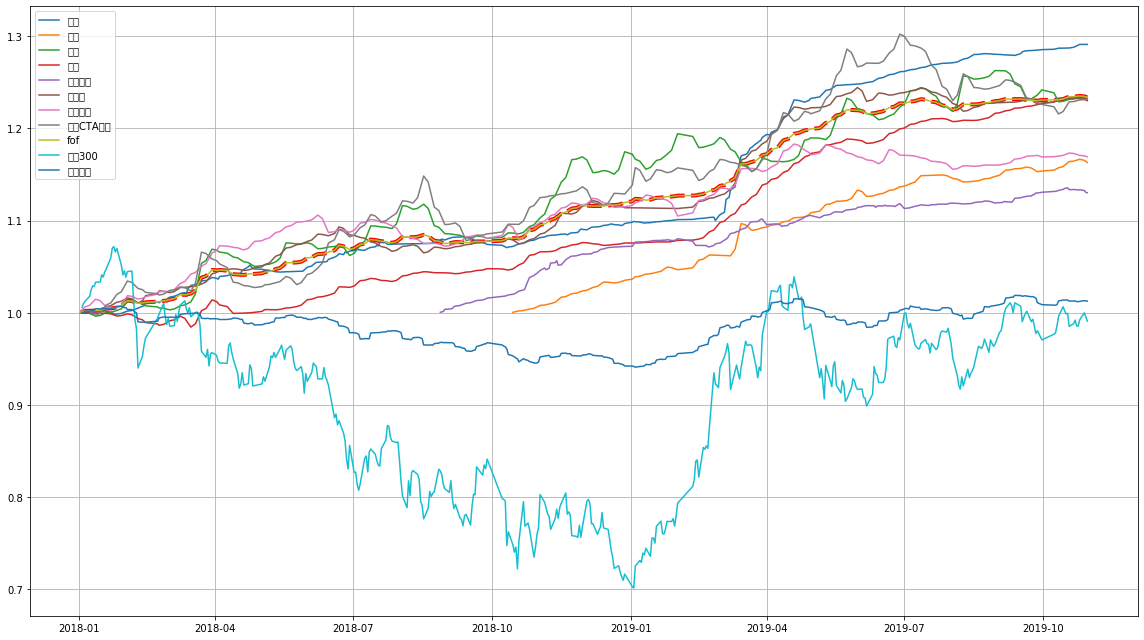

In [9]:
%matplotlib inline
fig = plt.figure(figsize=(16,9))
fig.set_tight_layout(True)
ax1 = fig.add_subplot(111)
ax1.grid()

ax1.plot(total_value.index, total_value['fof'], linewidth=4, color='red',linestyle='--')  # fof突出显示

for col in total_value.columns:
    data = total_value[col]
    ax1.plot(data.index, data.values, label=data.name)

ax1.legend(loc=2)